In [4]:
!pip install --upgrade umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.5 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import umap

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS


import random
import time


In [9]:
import pandas as pd

ruta_archivo = ("iris (1).data")
df = pd.read_csv(ruta_archivo)
print(df.head())  # Muestra las primeras filas del DataFrame

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [16]:
import pandas as pd

ruta_archivo2 = ("Index (1)")
Iris = pd.read_csv(ruta_archivo2)
print(Iris.head())  # Muestra las primeras filas del DataFrame

                     Index of iris
0       02 Dec 1996      105 Index
1   08 Mar 1993     4551 iris.data
2  30 May 1989     2604 iris.names


In [26]:
# Read and display the content of the .names file
ruta = "iris (1).names"
with open(ruta, 'r') as file:
    content = file.read()
    print(content)



# Update the file name and path if necessary
ruta = "iris (1).data"
data = pd.read_csv(ruta)
print(data.head())


1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [27]:

# First, let's check their shapes to see how we can merge them
print(data.shape)
print(df.shape)

# If they have the same number of rows, we can try concatenating them horizontally
if data.shape[0] == df.shape[0]:
    result = pd.concat([data, df], axis=1)
    print(result.head())
else:
    # If they have a common column, we can try merging them based on that column
    # Replace 'common_column' with the actual name of the common column
    common_column = 'sepal_length'
    if common_column in data.columns and common_column in df.columns:
        result = pd.merge(data, df, on=common_column)
        print(result.head())
    else:
        print("DataFrames cannot be merged directly. Please provide more information about the datasets and how you want to combine them.")

(149, 5)
(149, 5)
   5.1  3.5  1.4  0.2  Iris-setosa  5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa  5.4  3.9  1.7  0.4  Iris-setosa


In [38]:
# ... código anterior para crear el DataFrame 'result' ...

# Renombrar la columna 6 a 'species'
result = result.rename(columns={result.columns[5]: 'Medidas'})
# ... código anterior para crear el DataFrame 'result' y renombrar la columna 6 ...

# Renombrar la columna "Iris-setosa" a "Medidas"
result = result.rename(columns={"Iris-setosa": "Species"})

print(result.head())



   Medidas  3.5  1.4  0.2      Species  Medidas  3.5  1.4  0.2      Species
0      4.9  3.0  1.4  0.2  Iris-setosa      4.9  3.0  1.4  0.2  Iris-setosa
1      4.7  3.2  1.3  0.2  Iris-setosa      4.7  3.2  1.3  0.2  Iris-setosa
2      4.6  3.1  1.5  0.2  Iris-setosa      4.6  3.1  1.5  0.2  Iris-setosa
3      5.0  3.6  1.4  0.2  Iris-setosa      5.0  3.6  1.4  0.2  Iris-setosa
4      5.4  3.9  1.7  0.4  Iris-setosa      5.4  3.9  1.7  0.4  Iris-setosa


In [41]:
# ... código anterior para crear y renombrar columnas en el DataFrame 'result' ...

# Calcular la suma total de la columna "Medidas"
total_medidas = result['Medidas'].sum()
print("Suma total de 'Medidas':", total_medidas)

# Mostrar información de la columna "Species" (valores únicos y recuento)
info_species = result['Species'].describe()
print("\nInformación de la columna 'Species':")
print(info_species)


Suma total de 'Medidas': Medidas    871.4
Medidas    871.4
dtype: float64

Información de la columna 'Species':
                Species          Species
count               149              149
unique                3                3
top     Iris-versicolor  Iris-versicolor
freq                 50               50


In [42]:
import pandas as pd

ruta_archivo2 = ("bezdekIris (1).data")  # Reemplaza 'USUARIO' con tu nombre de usuario
Data2 = pd.read_csv(ruta_archivo2)
print(Data2.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [48]:
# Rename columns of Data2
Data2 = Data2.rename(columns={
    Data2.columns[0]: 'numero',
    Data2.columns[1]: 'Medidas1',
    Data2.columns[2]: 'medidas2',
    Data2.columns[3]: 'Peso',
    Data2.columns[4]: 'Name'  # Removed the renaming of a non-existent 5th column
})

print(Data2.head())

   numero  Medidas1  medidas2  Peso         Name
0     4.9       3.0       1.4   0.2  Iris-setosa
1     4.7       3.2       1.3   0.2  Iris-setosa
2     4.6       3.1       1.5   0.2  Iris-setosa
3     5.0       3.6       1.4   0.2  Iris-setosa
4     5.4       3.9       1.7   0.4  Iris-setosa


In [51]:
import pandas as pd

ruta = "bezdekIris (1).data"  # Ajustar el nombre del archivo si es necesario
data2 = pd.read_csv(ruta, header=None)  # Cargar los datos sin cabecera

# Renombrar las columnas
column_names = ["numero", "Medidas1",  "medidas2",  "Peso", "Name"]
data2.columns = column_names

# Calcular la suma total de la columna "Medidas"
total_medidas = data2['Medidas1'].sum()
print("Suma total de 'Medidas1':", total_medidas)

# Mostrar información de la columna "Species" (valores únicos y recuento)
info_species = data2['Name'].describe()
print("\nInformación de la columna 'Name':")
print(info_species)

# Calcular el promedio de la columna "Medidas"
promedio_medidas = data2['Medidas1'].mean()
print("Promedio de 'Medidas1':", promedio_medidas)


Suma total de 'Medidas1': 458.6

Información de la columna 'Name':
count             150
unique              3
top       Iris-setosa
freq               50
Name: Name, dtype: object
Promedio de 'Medidas1': 3.0573333333333337


Suma total de 'Medidas1': 458.6

Información de la columna 'Name':
count             150
unique              3
top       Iris-setosa
freq               50
Name: Name, dtype: object
Promedio de 'Medidas1': 3.0573333333333337


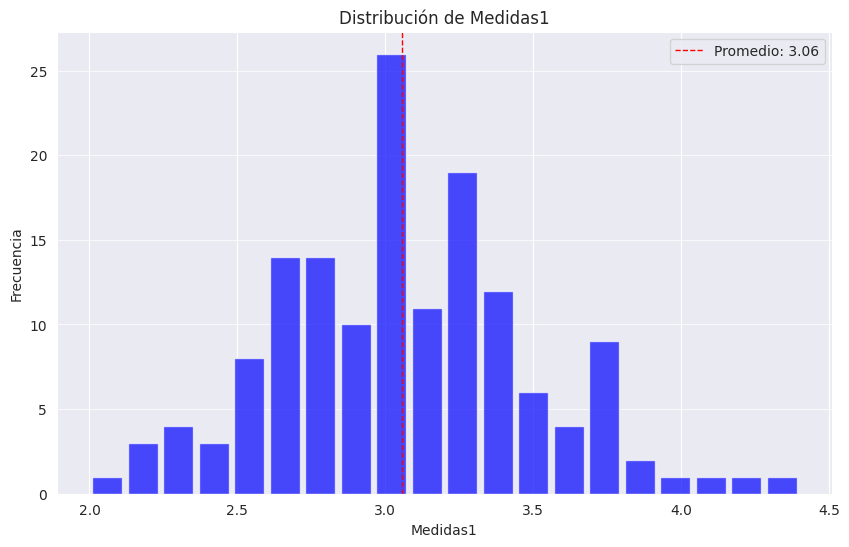

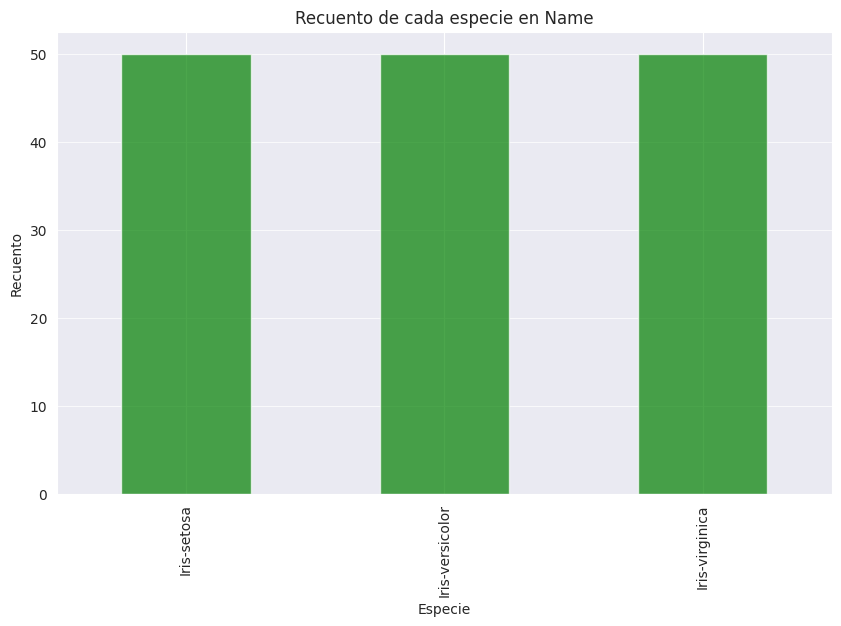

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que la data se encuentra en un archivo CSV
ruta = "bezdekIris (1).data"  # Ajustar el nombre del archivo si es necesario
data2 = pd.read_csv(ruta, header=None)  # Cargar los datos sin cabecera

# Renombrar las columnas
column_names = ["numero", "Medidas1", "Medidas2", "Peso", "Name"]
data2.columns = column_names

# Calcular la suma total de la columna "Medidas1"
total_medidas = data2['Medidas1'].sum()
print("Suma total de 'Medidas1':", total_medidas)

# Mostrar información de la columna "Name" (valores únicos y recuento)
info_species = data2['Name'].describe()
print("\nInformación de la columna 'Name':")
print(info_species)

# Calcular el promedio de la columna "Medidas1"
promedio_medidas = data2['Medidas1'].mean()
print("Promedio de 'Medidas1':", promedio_medidas)

# Graficar la distribución de 'Medidas1'
plt.figure(figsize=(10, 6))
plt.hist(data2['Medidas1'], bins=20, color='blue', alpha=0.7, rwidth=0.85)
plt.title('Distribución de Medidas1')
plt.xlabel('Medidas1')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.axvline(promedio_medidas, color='red', linestyle='dashed', linewidth=1, label=f'Promedio: {promedio_medidas:.2f}')
plt.legend()
plt.show()

# Graficar el recuento de cada especie en 'Name'
plt.figure(figsize=(10, 6))
data2['Name'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Recuento de cada especie en Name')
plt.xlabel('Especie')
plt.ylabel('Recuento')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [53]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

# Suponiendo que la data se encuentra en un archivo CSV
ruta = "bezdekIris (1).data"  # Ajustar el nombre del archivo si es necesario
data2 = pd.read_csv(ruta, header=None)  # Cargar los datos sin cabecera

# Renombrar las columnas
column_names = ["numero", "Medidas1", "Medidas2", "Peso", "Name"]
data2.columns = column_names

# Seleccionar solo las columnas numéricas para el cálculo de distancias
numerical_data = data2[["Medidas1", "Medidas2", "Peso"]]

# Calcular la distancia de Manhattan
def manhattan_distance(row1, row2):
    return distance.cityblock(row1, row2)

# Calcular la distancia Euclidiana
def euclidean_distance(row1, row2):
    return distance.euclidean(row1, row2)

# Crear matrices para almacenar las distancias
num_rows = len(numerical_data)
manhattan_distances = np.zeros((num_rows, num_rows))
euclidean_distances = np.zeros((num_rows, num_rows))

# Calcular las distancias entre cada par de filas
for i in range(num_rows):
    for j in range(i + 1, num_rows):
        manhattan_distances[i, j] = manhattan_distance(numerical_data.iloc[i], numerical_data.iloc[j])
        euclidean_distances[i, j] = euclidean_distance(numerical_data.iloc[i], numerical_data.iloc[j])
        # Las distancias son simétricas
        manhattan_distances[j, i] = manhattan_distances[i, j]
        euclidean_distances[j, i] = euclidean_distances[i, j]

# Mostrar las matrices de distancias
print("Matriz de Distancias de Manhattan:")
print(manhattan_distances)

print("\nMatriz de Distancias Euclidianas:")
print(euclidean_distances)


Matriz de Distancias de Manhattan:
[[0.  0.5 0.4 ... 6.1 6.2 5.8]
 [0.5 0.  0.3 ... 5.6 6.5 5.3]
 [0.4 0.3 0.  ... 5.9 6.4 5.6]
 ...
 [6.1 5.6 5.9 ... 0.  0.9 0.3]
 [6.2 6.5 6.4 ... 0.9 0.  1.2]
 [5.8 5.3 5.6 ... 0.3 1.2 0. ]]

Matriz de Distancias Euclidianas:
[[0.         0.5        0.31622777 ... 4.23438307 4.51884941 4.0620192 ]
 [0.5        0.         0.2236068  ... 4.20475921 4.53541619 4.03112887]
 [0.31622777 0.2236068  0.         ... 4.3        4.61085675 4.12795349]
 ...
 [4.23438307 4.20475921 4.3        ... 0.         0.53851648 0.2236068 ]
 [4.51884941 4.53541619 4.61085675 ... 0.53851648 0.         0.70710678]
 [4.0620192  4.03112887 4.12795349 ... 0.2236068  0.70710678 0.        ]]


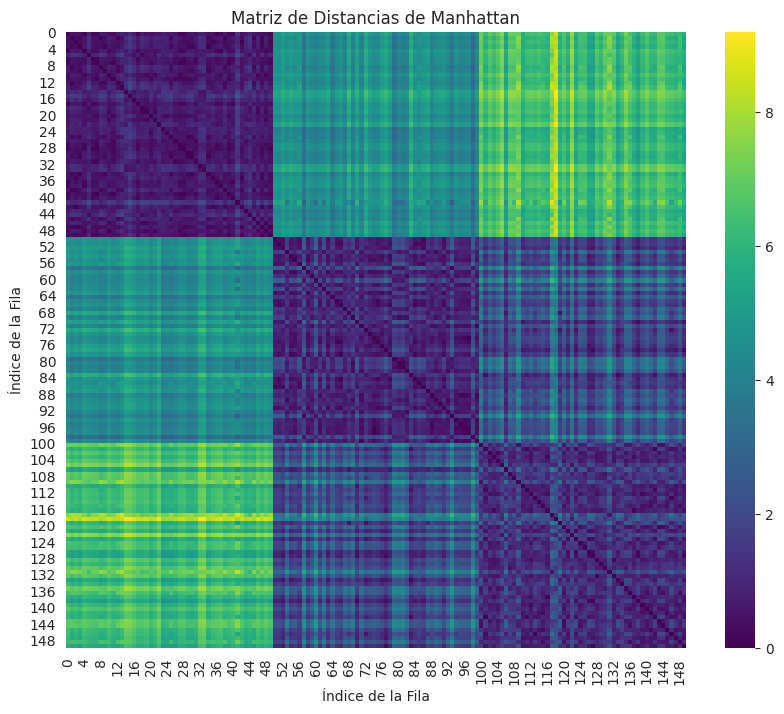

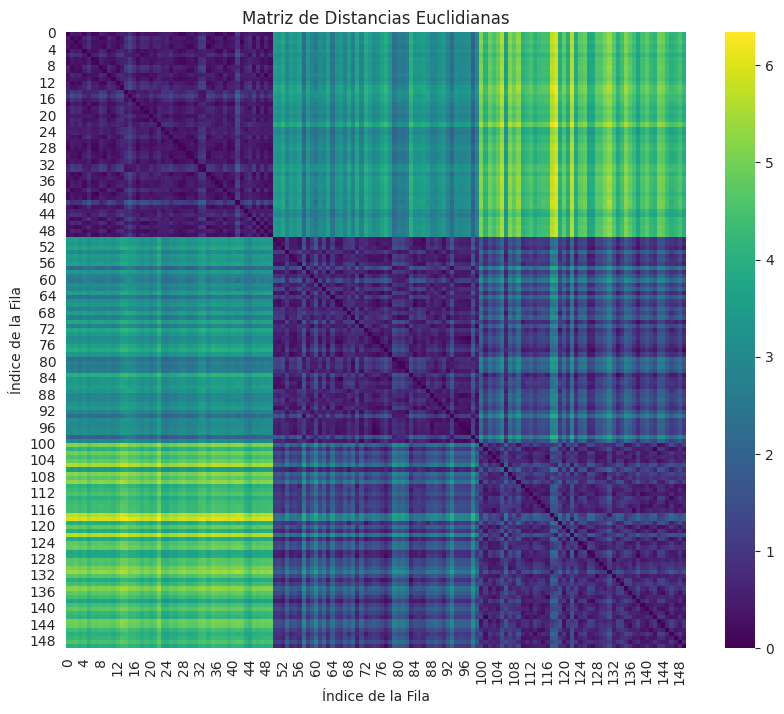

In [54]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que la data se encuentra en un archivo CSV
ruta = "bezdekIris (1).data"  # Ajustar el nombre del archivo si es necesario
data2 = pd.read_csv(ruta, header=None)  # Cargar los datos sin cabecera

# Renombrar las columnas
column_names = ["numero", "Medidas1", "Medidas2", "Peso", "Name"]
data2.columns = column_names

# Seleccionar solo las columnas numéricas para el cálculo de distancias
numerical_data = data2[["Medidas1", "Medidas2", "Peso"]]

# Calcular la distancia de Manhattan
def manhattan_distance(row1, row2):
    return distance.cityblock(row1, row2)

# Calcular la distancia Euclidiana
def euclidean_distance(row1, row2):
    return distance.euclidean(row1, row2)

# Crear matrices para almacenar las distancias
num_rows = len(numerical_data)
manhattan_distances = np.zeros((num_rows, num_rows))
euclidean_distances = np.zeros((num_rows, num_rows))

# Calcular las distancias entre cada par de filas
for i in range(num_rows):
    for j in range(i + 1, num_rows):
        manhattan_distances[i, j] = manhattan_distance(numerical_data.iloc[i], numerical_data.iloc[j])
        euclidean_distances[i, j] = euclidean_distance(numerical_data.iloc[i], numerical_data.iloc[j])
        # Las distancias son simétricas
        manhattan_distances[j, i] = manhattan_distances[i, j]
        euclidean_distances[j, i] = euclidean_distances[i, j]

# Graficar la matriz de distancias de Manhattan
plt.figure(figsize=(10, 8))
sns.heatmap(manhattan_distances, cmap='viridis', annot=False)
plt.title('Matriz de Distancias de Manhattan')
plt.xlabel('Índice de la Fila')
plt.ylabel('Índice de la Fila')
plt.show()

# Graficar la matriz de distancias Euclidianas
plt.figure(figsize=(10, 8))
sns.heatmap(euclidean_distances, cmap='viridis', annot=False)
plt.title('Matriz de Distancias Euclidianas')
plt.xlabel('Índice de la Fila')
plt.ylabel('Índice de la Fila')
plt.show()


In [ ]:
#Observaciones de la Matriz de Distancias de Manhattan:
#Áreas con colores uniformes sugieren agrupamientos de datos similares.
 #Clusters definidos indican que algunas muestras están más cercanas entre sí.
- #Mayor rango de valores de distancia sugiere variabilidad en la distribución de los datos.

#Observaciones de la Matriz de Distancias Euclidianas:
- #Similar a la matriz de Manhattan, pero puede mostrar más variabilidad en las distancias debido a la naturaleza de la métrica Euclidiana.
- #Clusters definidos aquí también sugieren agrupamientos en los datos.
- #Las áreas con distancias altas pueden señalar outliers o grupos que están muy alejados unos de otros.
